# 1. Binomial and Gaussian Distributions

Basically, this problem is a repeat of a previous problem (in HW1). The goal of this problem is to show how a Gaussian distribution is a good approximation of a Poisson or binomial distribution at high expected counts ($\lambda$ or $\mu$). Furthermore, a Gaussian distribution is continuous whereas the Poisson and binomial distributions can be difficult to evaluate via computer at high $n$. 

In this problem, a well-established count rate of photons from a star (from a given telescope) is 0.1/s. The photons from a star are counted for 100 seconds by a "perfect" CCD that is read out every 1 second (1 second accumulation).

## Part (a) 
Start with the binomial distribution. Write a program that calculates $P(x;n,p)$ as a function of $x$ with $n=100$ and $p=0.1$. Plot your results for $0 \le x \le 20$.

### Jasmine's reminder to self

**Binomial probability:**

\begin{align*}
P_B(x;n,p) &= \frac{n!}{(n-x)!x!}p^x q^{n-x}
\end{align*}

where, $q=1-p$

And other useful:

\begin{align*}
&E(x) = \mu \\
&E(x-\mu)^2 = \sigma^2
\end{align*}

where, $E(f(x)) = \sum f(x)P(x)$

In [1]:
# libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from scipy.special import factorial
from scipy.signal import peak_widths

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# import helper script file
import os,sys
src_dir = os.path.abspath("")  # string path to parent directory of file
hw_dir = os.path.dirname(src_dir)
os.chdir(hw_dir)

import hw_helper_func2 as hf

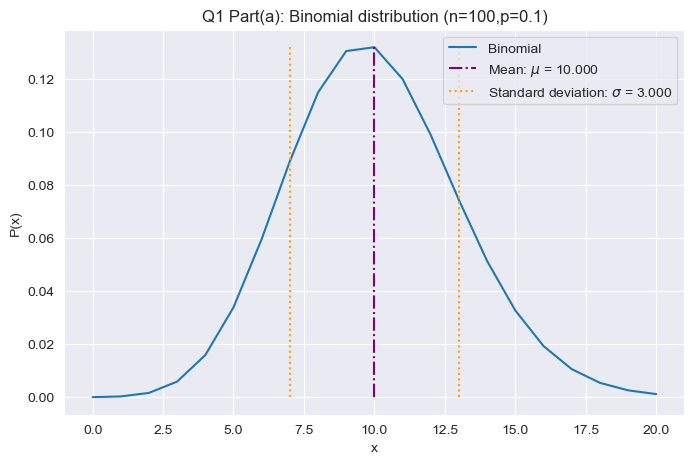

In [3]:
part_a = hf.binomial_distribution(x_min=0,x_max=20,n=100,p=0.1)
plt.figure(figsize=(8,5))
part_a.plot_binomial(title="Q1 Part(a): Binomial distribution (n={},p={})".format(part_a.n,part_a.p))

## Part (b)

Overplot the Poisson distribution; use a different color or line style to distinguish the two. What is the mean and sigma?

### Jasmine's reminder to self

**Poisson probability:**

\begin{align*}
P_P(x;\lambda) &= \frac{\lambda^x}{x!}e^{-\lambda}
\end{align*}

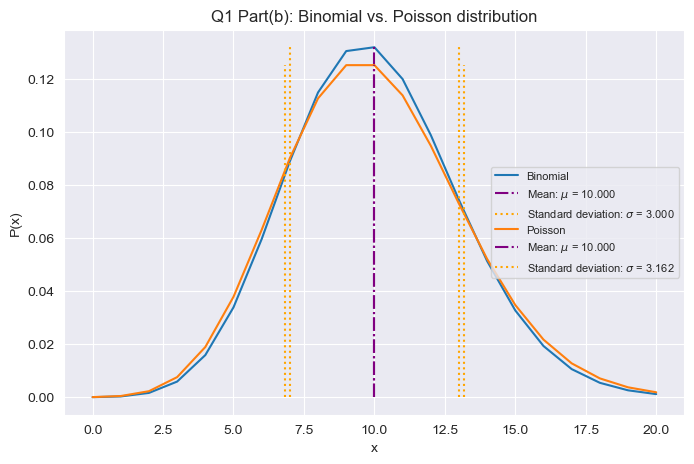

In [4]:
part_b = hf.poisson_distribution(mu=part_a.mu,x_max=20)  #instantiation

# comparison plot between Binomial and Poisson
plt.figure(1,figsize=(8,5))
#Binomial
part_a.plot_binomial(label="Binomial")

#Poisson
part_b.plot_poisson(title="Q1 Part(b): Binomial vs. Poisson distribution")
plt.legend(loc='center right',fontsize=8)

## Part (c)

Overplot the Gaussian distribution using a fine x-axis. How close are the two functions? Do they peak at the same value? Is it reasonable to assume a Gaussian parent distribution in this case?

### Jasmine's reminder to self

**Gaussian probability:**

\begin{align*}
P_G(x;\lambda, \sigma) &= \frac{1}{\sigma \sqrt{2 \pi}}\exp\left({\frac{-(x-\lambda)^2}{2\sigma^2}}\right)
\end{align*}

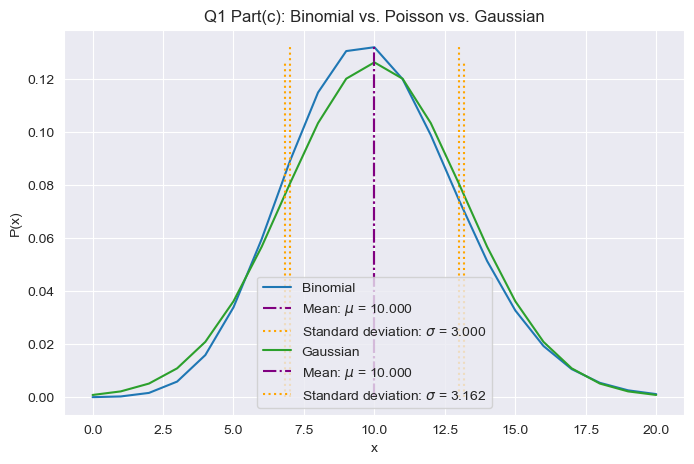

In [5]:
part_c = hf.gaussian_distribution(mu=part_a.mu,sigma=part_b.sigma,x_max=20)  #instantiation

# comparison plot between Binomial and Poisson
plt.figure(1,figsize=(8,5))

#Binomial
part_a.plot_binomial(label="Binomial")

#Gaussian
part_c.plot_gaussian(title="Q1 Part(c): Binomial vs. Poisson vs. Gaussian")
plt.legend()

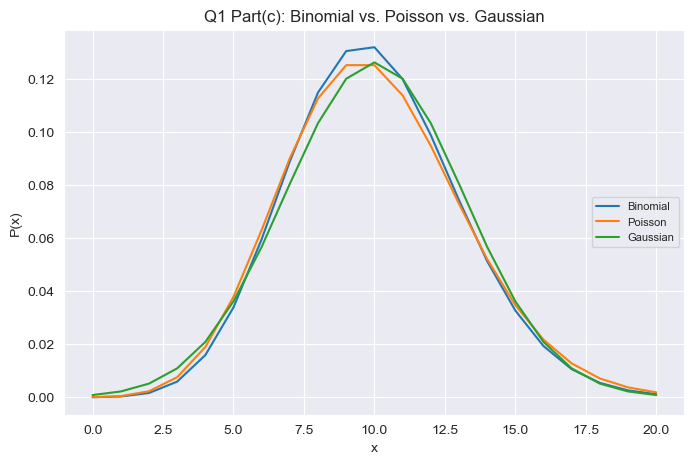

In [6]:
# comparison plot between all
plt.figure(1,figsize=(8,5))
#Binomial
part_a.plot_binomial(label="Binomial",comprehensive=False)

#Poisson
part_b.plot_poisson(title="Q1 Part(b): Binomial vs. Poisson distribution",comprehensive=False)

#Gaussian
part_c.plot_gaussian(title="Q1 Part(c): Binomial vs. Poisson vs. Gaussian",comprehensive=False)

plt.legend(loc='center right',fontsize=8)


# 2. How Old is This Volcano?

The age of a volcanic eruption on Mars can be inferred from counting the surface density of craters of a given diameter or greater. It is established that the impact rate $r=0.01$ craters $\text{km}^{-2}\text{Myr}^{-1}$. You survey an area ($A$) of 10 $\text{km}^2$ and find 3 craters ($x$).

## Part (a)
Start by making a simple estimate of the volcano's age and a standard deviation.

### Jasmine's written answer
#### Simple estimate of age
We have 
- established impact rate: $r=0.01 \frac{\text{craters}}{\text{km}^2\text{Myr}}$
- number of craters observed: $x=3 \text{ craters}$
- survey area: $A = 10 \text{ km}^2$

And let's call the simple estimate of age, $y$.

Therefore,

\begin{align*}
r &= \frac{x}{A * t} \\
\Rightarrow t &= \frac{x}{A * r}
\end{align*}

Plug in numbers:

\begin{align*}
t &= \frac{x}{A * r} \\
&= \frac{3}{(10)(0.01)} \\
\end{align*}

In [7]:
#approx age
x = 3
r = 0.01
A = 10

age = x/(A*r)
print("Simple estimate of age:",age,"Myr")

Simple estimate of age: 30.0 Myr


\begin{align*}
t &= \frac{x}{A * r} \\
&= \frac{3}{(10)(0.01)} \\
\end{align*}

$$\boxed{t = 30 \text{ Myr}}$$

#### Standard deviation

\begin{align*}
\sigma = \sqrt{3/10} \approx 0.5477
\end{align*}

(Honestly, I'm not sure if I chose an overly simplistic way to calculate the standard deviation.)

## Part (b)

The simple estimation of the age and uncertainty is often adequate. One can explore this problem further by calculating the *posterior* probability, $P(x;t)$ over a range of times (say, $t=0$ to 150 in Myr intervals) assuming a Poisson parent distribution and knowing $x=3$. Do this problem on your computer. 

Important point: the initial calculation yields a set of *relative* probabilities; under Bayes' law: 
$$P(t;x) = \frac{P(x;t)P(t)}{P(x)}$$

Since we have no prior knowledge in this case, we treat $P(t)/P(x)$ as a constant; You must normalize $P(t;x)$ so that the total probability is $1$. $P(t;x)$ will have units of "probability/Myr". Plot your results. Mark the mean and mode (most likely age) and directly compute the standard deviation. Compare these values with your simple estimate.

### JK written answer

Poisson probability is often used for counting statistics

\begin{align*}
P_P(x;\lambda) &= \frac{\lambda^x}{x!}e^{-\lambda}
\end{align*}

Thus, $P(x;t) = P_P(x,\lambda)$

And, we're treating $P(t)/P(x)$ as a constant, such that $\displaystyle \sum_{i=0}^{t_f}P(t_i;x) = 1$

Therefore, we want

\begin{align*}
1 &= \displaystyle \sum_{i=0}^{t_f}P(t_i;x) = \displaystyle \sum_{i=0}^{t_f}P_p(x;t) \frac{P(t)}{P(x)} \\
\Rightarrow 1 &= \displaystyle \sum_{i=0}^{t_f}P_p(x;t) \frac{P(t)}{P(x)}
\end{align*}

Since we're treating $P(t)/P(x)$ as a constant, perhaps we just call it $k$, and perhaps move it in front of the summation. (We don't *have* to rename it a variable, but I just find it easier to think of it as a constant that way.)

\begin{align*}
\frac{P(t)}{P(x)} &= k \\
1 &= \displaystyle \sum_{i=0}^{t_f}P_p(x;t) \frac{P(t)}{P(x)} \Rightarrow 1 = k \displaystyle \sum_{i=0}^{t_f}P_p(x;t) \\
&\Rightarrow k = \frac{1}{\sum P_p(x;t)}
\end{align*}

In other words, 

\begin{align*}
\boxed{k = \frac{P(t)}{P(x)} = \frac{1}{\sum P_p(x;t)}}
\end{align*}

(I believe this is how we are '*normalizing*' the probability)

(0.0, 20.0)

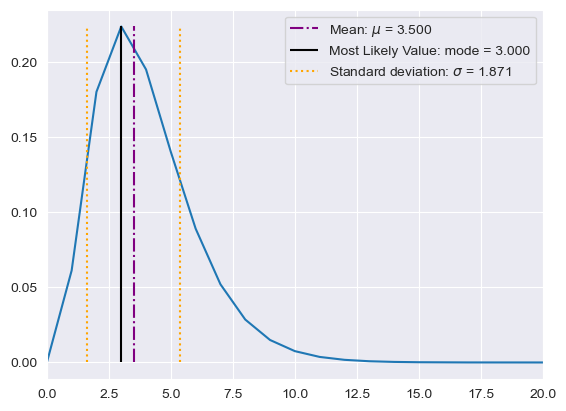

In [8]:
ppb = hf.Posterior_Probability(tf=150)

plt.plot(ppb.t,ppb.post_prob(x=3))
ppb.calculate_mean_mode_sigma()
ppb.Px = ppb.posterior
ppb.plot_mark_mean(mu=ppb.mu)
ppb.plot_mark_mode(mode=ppb.mode)
ppb.plot_mark_std(sigma=ppb.sigma,mu=ppb.mu)
plt.xlim([0,20])

## Part (c)

A low count rate creates two issues. One issue is, of course, that the standard deviation is large regardless of how it is calculated. The other issue is that the probability distributions are often not symmetric, which creates a bit of a conundrum. It is natural to choose the most likely value of $P(t;x)$ as the age of the volcano but one can see that there is a greater probability that the volcano is older than the likely age rather than younger (if your plot is correct at this point). So how does one determine the uncertainty?

There are several methods that can assign the uncertainty, one of which (relatively easy) is to calculate the full width at half the maximum (*FWHM*) of $P(t;x)$ and apply the Gaussian formula that $\text{FWHM} = \sigma \sqrt{8ln(2)}$ to calculate $\sigma$. What does the does this method yield $[t_{min},t_{max}]$? You now have calculated sigma three times. Is there a significant difference between them? (More to come on this!)

In [9]:
from scipy.signal import peak_widths

def get_fwhm(pdf):
    pdf_max = max(pdf)
    where_max = np.where(pdf == pdf_max)[0]
    fwhm = peak_widths(pdf,where_max,rel_height=0.5)[0]
    return fwhm

In [10]:
FWHM = get_fwhm(ppb.posterior)
print('FWHM =',FWHM)

FWHM = [4.12879567]


We're using $\text{FWHM} = \sigma \sqrt{8ln(2)}$ to get $\sigma$, therefore

\begin{align*}
\text{FWHM} &= \sigma \sqrt{8ln(2)} \\
\Rightarrow \sigma &= \frac{\text{FWTH}}{\sqrt{8\ln(2)}}
\end{align*}

In [11]:
print('FWHM =',FWHM)

Q2pc_sigma = FWHM/np.sqrt(8*np.log(2))
print('sigma =',Q2pc_sigma)

FWHM = [4.12879567]
sigma = [1.75333809]


## Part (d)

Now suppose that 34 impact craters are identified over a 100 $\text{km}^2$ area. Redo parts (a), (b), and (c). Plot your results and compare.

In [12]:
# Q2 - Part (d): redo Part (a)
#approx age
x = 34
r = 0.01
A = 100
A
age = x/(A*r)
print("Simple estimate of age:",age,"Myr")

Simple estimate of age: 34.0 Myr


\begin{align*}
t &= \frac{x}{A * r} \\
&= \frac{34}{(100)(0.01)} \\
\end{align*}

$$\boxed{t = 34 \text{ Myr}}$$

#### Standard deviation

\begin{align*}
\sigma = \sqrt{34/100} \approx 0.5830
\end{align*}

(Well, I'm starting to believe that the standard deviation calculation is overly simple because that seems way too small.)

(0.0, 100.0)

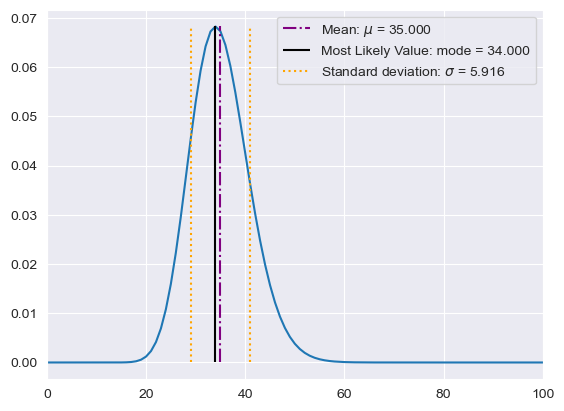

In [13]:
# Q2 - Part (d): redo Part (b)
ppd = hf.Posterior_Probability(tf=150,obs_area=100)

plt.plot(ppd.t,ppd.post_prob(x=34))
ppd.Px = ppd.posterior
ppd.calculate_expected_mean_mode_sigma(x=ppd.t,Px=ppd.Px,set_to_object=True)
ppd.plot_mark_mean(mu=ppd.mu)
ppd.plot_mark_mode(mode=ppd.mode)
ppd.plot_mark_std(sigma=ppd.sigma,mu=ppd.mu)
plt.xlim([0,100])

In [14]:
# Q2 - Part (d): redo Part (c)

FWHM_d = get_fwhm(ppd.posterior)[0]
print('FWHM =',FWHM_d)

Q2pd_sigma = FWHM_d/np.sqrt(8*np.log(2))
print('sigma =',Q2pd_sigma)

FWHM = 13.759478801950983
sigma = 5.843112653548922


#### JK written answer/comment:

Well, I might've missed something because I was expecting Parts (a), (b), and (c) to be similar (and similarly in all redone parts in part (d)). I'm guessing I overly simplified part (a) or messed something up in my coding functions in parts (b) and (c). (Or worse, both.)

# 3. Random Walk and the Central Limit Theorem

## Part (a)

The random walk is often used to eludicate the central limit theorem. Using a classical but perhaps no longer politically correct analogy, a drunk at a lamp post ($x=0$) takes a step either to the left or to the right with equal probability. His/her position ($x$) after $n$ steps, can be represented with the binomial distribution:

$$P_B(x;n,p) = \frac{n!}{(n-x)!x!} p^{x+1}q^{n-x}$$

Set $p=1/2$ for a step to the right (positive) of one unit, otherwise the step is to the left. The distance traveled is the $d=2x-n$. We know from the central limit theorem that $P_B(d;n,p)$ approaches a Gaussian at large $n$. Numerically calculate and plot $P_B(d;n,p)$ for $n=100$. 

Overplot: $$P_G(d) = \frac{C}{\sigma \sqrt{2\pi}} e^{-\frac{d^2}{2\sigma ^2}}$$

Careful with normalization! $P_B(d;n,p)$ is normalized so that its total is 1. When using $d=2x-n$ with $n$ as an even number, $d$ must be an even number. There are only 101 possible positions. On the other hand, $P_G(d)$ does not require $d$ to be even (or an integer for that matter) and has twice as many possible positions. 

I recommend that the plot is log/linear with the vertical axis (probability) range of $10^{-5}$ to $1$. Don't print it out yet. See below.

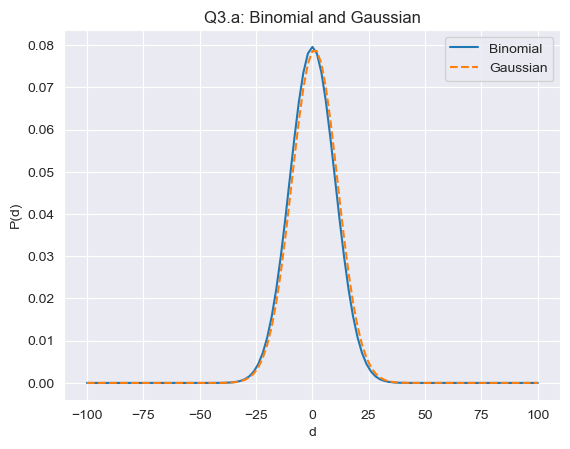

In [15]:
n = 100
p = 0.5 

rw = hf.rand_walk(n=n,p=p)
rw.plot_rand_walk_BG(title = "Q3.a: Binomial and Gaussian")

## Part (b)

What if, however, the lamppost ($x=0$) is at the bottom of a parabolic valley as pictured below. Let the altitude be $z=0.005 d^2$, so that the $\text{slope} = 0.01 d$. Now suppose the drunk tends to stagger downhill. Let the probability of a right step be $0.5-\text{slope}$. With a brute force algorithm, calculate $P(d)$. Overplot your results. What is $\sigma$?

![valley](Capture.PNG)

Hint: Implement a random walk program with $n=100$ steps by calling a uniform random number then comparing to the right-step probability, which is a function of position. Record the end position. Loop ~100,000 times and make a histogram of the end positions.

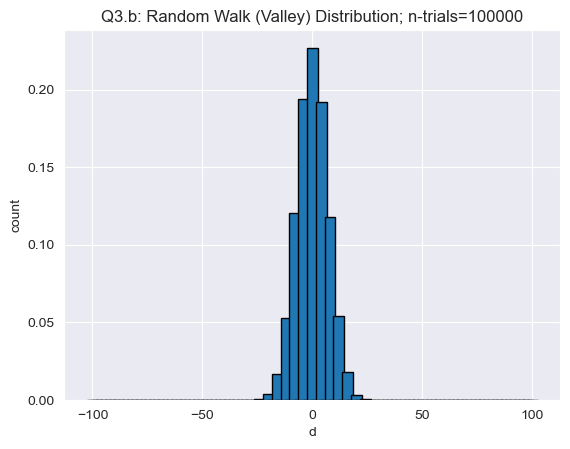

CPU times: total: 21.2 s
Wall time: 21.6 s


In [16]:
%%time
ntrials = 100000
rwb = hf.rand_slope_walk(step=1)

rwb.plot_walk_count(title='Q3.b: Random Walk (Valley) Distribution; n-trials={}'.format(ntrials),
ntrial=ntrials,
bar_width = 5.0)

In [17]:
rwb.get_mu_sig()
print("sigma =",rwb.sigma)

sigma = 6.999431405478591


## Part (c)

Now put the lamppost ($x=0$) at the top of a parabolic hill so that the $\text{slope}= -0.01 d$. Overplot your results. What is $\sigma$?

Note: You will notice that your results look Gaussian. However, the central limit theory does **not** necessarily apply for steps (b) and (c). Save your code for the next problem when we look at power-law tails. 

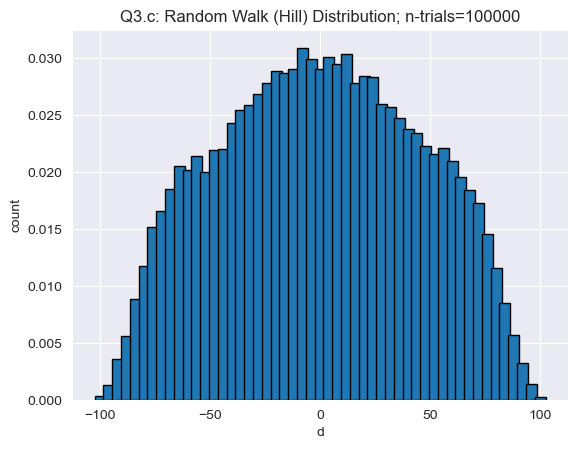

CPU times: total: 24.1 s
Wall time: 24.9 s


In [18]:
%%time
ntrials=100000
rwc = hf.rand_slope_walk(slope_const=-0.01)

rwc.plot_walk_count(title='Q3.c: Random Walk (Hill) Distribution; n-trials={}'.format(ntrials),
ntrial=ntrials,
bar_width=5.0)

In [19]:
rwc.get_mu_sig()
print("sigma =",rwc.sigma)

sigma = 45.10825024316505


# 4. Not so Random Walk: Power Law

In this problem, we repeat problem 3 with a new caveat. His/her step size is 0.50 (whatever units) but increases with absolute value of his/her current position: 
$$\text{Step} = 0.5 + |x| * 0.025$$

Let the number of steps be $n=400$ (half the original step size, so four times the number of steps). Implement a random walk program with $n=400$ steps by calling a uniform random number then comparing to the right-step probability, in this case 1/2. Record the end position. Loop ~100,000 times and make a histogram of the end positions.

Calculate $\sigma$. The mean should be zero. Overplot a Gaussian with the calculated $\sigma$. Is the resulting distribution a Gaussian?

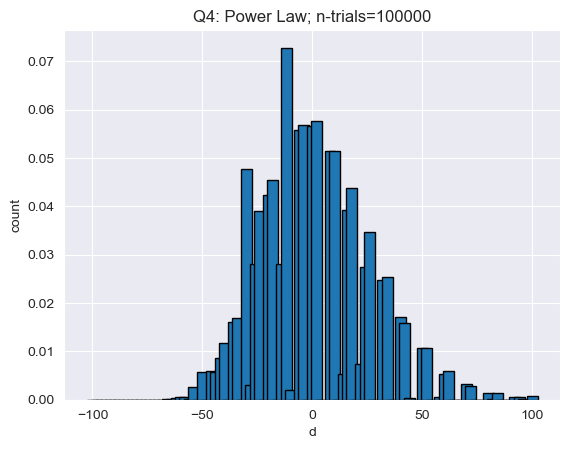

CPU times: total: 45.7 s
Wall time: 47.1 s


In [20]:
%%time
ntrials=100000
rwpl = hf.rand_power_law(n=400)

rwpl.plot_walk_count(title='Q4: Power Law; n-trials={}'.format(ntrials),
ntrial=ntrials,
bar_width=5.0)
